# **Introduction**
---

### **Objective**

The objective of this notebook is to perform an **Exploratory Data Analysis (EDA)** on the car price prediction dataset to uncover insights, understand relationships between features, and identify any data issues like missing values or outliers. These insights will help guide the next steps in feature engineering, where we will transform and optimize features to improve the model's predictive performance.

In this notebook:
1. **EDA** will focus on visualizing and summarizing data patterns and relationships without modifying the raw data.
2. **Feature Engineering** (in a subsequent, separate notebook) will apply data transformations,create new features, and perform feature selection based on the findings from EDA to enhance model training.


### **EDA Approach**

1. **Dataset Overview**
   - Briefly understand the problem domain and dataset.
   - Look at the dataset's size, type of data, and sources.

2. **Load and Inspect Data**
   - Load the dataset using appropriate libraries (e.g., pandas).
   - Check for basic properties of the dataset like shape, data types, and missing values.
   - Use `head()`, `info()`, and `describe()` methods to get an overview.

3. **Data Cleaning**
   - Handle missing data by either removing or imputing missing values.
   - Identify and remove duplicate records.
   - Correct any data entry errors or inconsistencies (e.g., incorrect data types).
   - Remove or treat outliers if necessary.

4. **Univariate Analysis**
   - Analyze individual features (columns).
   - Use visualizations like histograms, box plots, and bar plots to understand the distribution of data.
   - Summarize statistics for each feature (mean, median, mode, variance, etc.).

5. **Bivariate Analysis**
   - Analyze the relationship between two variables.
   - Use scatter plots, correlation matrices, and pair plots to explore the relationships between features.
   - Check for correlations, trends, or patterns between two variables.

6. **Insights**
   - Summarize key findings and patterns from the EDA process.
   - Identify potential challenges and areas for further analysis.
   - Highlight important features that can be useful for building predictive models.


## **Step 1: Dataset Overview**

**Context**

With the rise in the variety of cars offering diverse capabilities and features—such as model, production year, brand, fuel type, engine volume, mileage, and many more—the car market has become highly competitive. Buyers are looking for the best features available within their budget, making car price prediction a valuable tool. This challenge leverages a dataset of 19,237 entries for training and 8,245 entries for testing to predict car prices based on their features.

**Data Description**

- **Train.csv**: Contains 19,237 rows and 18 columns, including the target variable, `Price`.
- **Test.csv**: Contains 8,245 rows and 17 columns, without the target variable.

**Attributes**

1. **ID**: Unique identifier for each car entry.
2. **Price**: Target variable representing the price of the car (present only in the training dataset).
3. **Levy**: Additional fee or tax, which might affect the car's overall cost.
4. **Manufacturer**: Brand of the car, such as Toyota, BMW, Ford, etc.
5. **Model**: Specific model name within the manufacturer's lineup.
6. **Prod. year**: Year of production, indicating the car’s age and likely affecting its depreciation.
7. **Category**: Car type or category, such as sedan, SUV, truck, etc.
8. **Leather interior**: Indicates whether the car has leather seats, a feature that might influence buyer preference and price.
9. **Fuel type**: Type of fuel the car uses (e.g., petrol, diesel, electric), which may impact running costs and buyer choice.
10. **Engine volume**: Size of the engine, typically measured in liters, affecting power and fuel efficiency.
11. **Mileage**: Distance the car has traveled, which is often linked to wear and tear.
12. **Cylinders**: Number of engine cylinders, affecting power and performance.
13. **Gear box type**: Type of transmission (e.g., automatic, manual), a factor in driver preference.
14. **Drive wheels**: Describes the drivetrain type (e.g., FWD, RWD, AWD), which impacts handling and traction.
15. **Doors**: Number of doors, which may affect car usability and buyer preference.
16. **Wheel**: Indicates the car’s steering side (e.g., left or right), possibly relevant to regional usage.
17. **Color**: Exterior color of the car, which might impact buyer appeal.
18. **Airbags**: Number of airbags, reflecting the car’s safety features.

This dataset provides a comprehensive view of each car's attributes, allowing for an in-depth exploration of the factors that influence car prices.

## **Step 2: Load and inspect data**

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into DataFrame
df= pd.read_csv(f'../../data/raw_data.csv')

# Display first 5 rows
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
# Checking statistical summary
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
# Check for null values in training dataset
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(313)

### **Observations**

1. The dataset contains a total of **18 columns**, out of which **13 are categorical** and **5 are numerical**.
2. The **column names** are not in a standard format (e.g., snake_case) and need to be standardized.
3. The column **"ID"** should be renamed to **"Id"** for consistency.
4. The **"Levy"** column should be of type **int64**, but it may need data cleaning or conversion.
5. The **"prod.year"** column should be renamed to **"manufacturing_year"** and converted to a **DateTime** object for better clarity and analysis.
6. The **"Mileage"** column should be renamed to **"distance_travelled"** to reflect the measurement more accurately and should be of type **int64**.
7. The **"Door"** column should contain **int64** values, but it currently has string values, requiring data type conversion.
8. The **"wheel"** column should be renamed to **"drive_type"** to better describe whether the car is a left-hand or right-hand drive.
9. There are **0 Null values** in the dataset.
10. There are **313 duplicate records** in the dataset.


## **Step 3: Data Cleaning**

Based on the observations from the **Dataset Overview** section, we will clean the data in this step.

### **Approach**

1. **Standardize Feature Names**
   - Ensure consistency in feature names by using a standard format (e.g., lowercase, underscores instead of spaces).

2. **Convert Data Types**
   - Adjust data types of certain features to ensure accuracy and efficiency (e.g., converting numerical data stored as strings).

3. **Handle Missing Values**
   - Identify and manage missing values using techniques like removal, imputation, or setting default values.

4. **Remove Duplicate Rows**
   - Detect and remove duplicate entries to avoid redundancy and maintain data quality.

5. **Outlier Treatment**
   - Identify outliers and decide on appropriate methods for handling them, such as removal or transformation, to prevent skewed analysis.


**Standardize Feature Names**

In [7]:
# Changing column names
df.rename(columns={'Prod. year':'manufacturing_year','Mileage':'distance_travelled', 'Wheel':'drive_type'},inplace=True)

# Standardize Feature Names
df.columns = [column.replace(" ", "_").lower() for column in df.columns]
df.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'manufacturing_year',
       'category', 'leather_interior', 'fuel_type', 'engine_volume',
       'distance_travelled', 'cylinders', 'gear_box_type', 'drive_wheels',
       'doors', 'drive_type', 'color', 'airbags'],
      dtype='object')

**Convert Data types**

While converting the `levy` column to `int64`, we noticed that some rows contain a hyphen ("-"). Therefore, we will first remove these hyphens before proceeding with the conversion.


In [8]:
# Replace '-' with an empty string, then convert to numeric (setting errors='coerce' will turn any non-numeric into NaN)
# Convert the 'levy' column to string type, then replace '-' with NaN
df['levy'] = df['levy'].astype(str).replace('-', None)

# Convert the column back to a numeric type, setting errors='coerce' to handle non-numeric entries as NaN
df['levy'] = pd.to_numeric(df['levy'], errors='coerce')
df['levy'].isnull().sum()


np.int64(5819)

After the conversion, we discovered that there are **5,819 rows with null values** in the `levy` column. During the conversion process, we will impute the missing values with the median of the column.



In [9]:
# Impute NaN values with the median of the 'levy' column
df['levy'] = df['levy'].fillna(df['levy'].median())

# Convert data type to int64
df['levy'] = df['levy'].astype('int64')

In [10]:
# Convert data type of manufacturing_year to DateTime
df['manufacturing_year'] = pd.to_datetime(df['manufacturing_year'], format='%Y')

In [11]:
# Convert data type of doors to int64
df['doors'].value_counts()

doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

The `doors` column contains three types of data:
1. Entries with `04-May` will be replaced with `4`.
2. Entries with `02-Mar` will be replaced with `2`.
3. Entries with `>5` will be replaced with `6`.

After replacing these values, we will convert the column to `int64`.


In [12]:
# Replacing values and converting dtype to int64
df['doors'].replace({
  '04-May':'4',
  '02-Mar':'2',
  '>5': '6'
}, inplace=True)
df['doors'] = df['doors'].astype(np.int64)
df['doors']

0        4
1        4
2        4
3        4
4        4
        ..
19232    2
19233    4
19234    4
19235    4
19236    4
Name: doors, Length: 19237, dtype: int64

In [13]:
# Convert data type of distance_travelled to int64

# Chekcing types of data available in distance_travelled
df['distance_travelled'].value_counts()

distance_travelled
0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
23430 km       1
132700 km      1
140607 km      1
307325 km      1
152582 km      1
Name: count, Length: 7687, dtype: int64

In [14]:
# Remove 'km' from the end of the string and convert to int64
df['distance_travelled'] = df['distance_travelled'].str.replace(' km', '', regex=False).astype('int64')

**Handle Missing Values**

In [15]:
# Checking for null values 
df.isnull().sum()

id                    0
price                 0
levy                  0
manufacturer          0
model                 0
manufacturing_year    0
category              0
leather_interior      0
fuel_type             0
engine_volume         0
distance_travelled    0
cylinders             0
gear_box_type         0
drive_wheels          0
doors                 0
drive_type            0
color                 0
airbags               0
dtype: int64

There are **no null values in the dataset**, so no further handling is required.


**Remove Duplicate Rows**

In [16]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(313)

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

**Outlier Treatment**

In [18]:
# Select columns with data types 'int64' and 'float64'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('id')

# Display the list of columns with int64 and float64 data types
numeric_columns

['price', 'levy', 'distance_travelled', 'cylinders', 'doors', 'airbags']

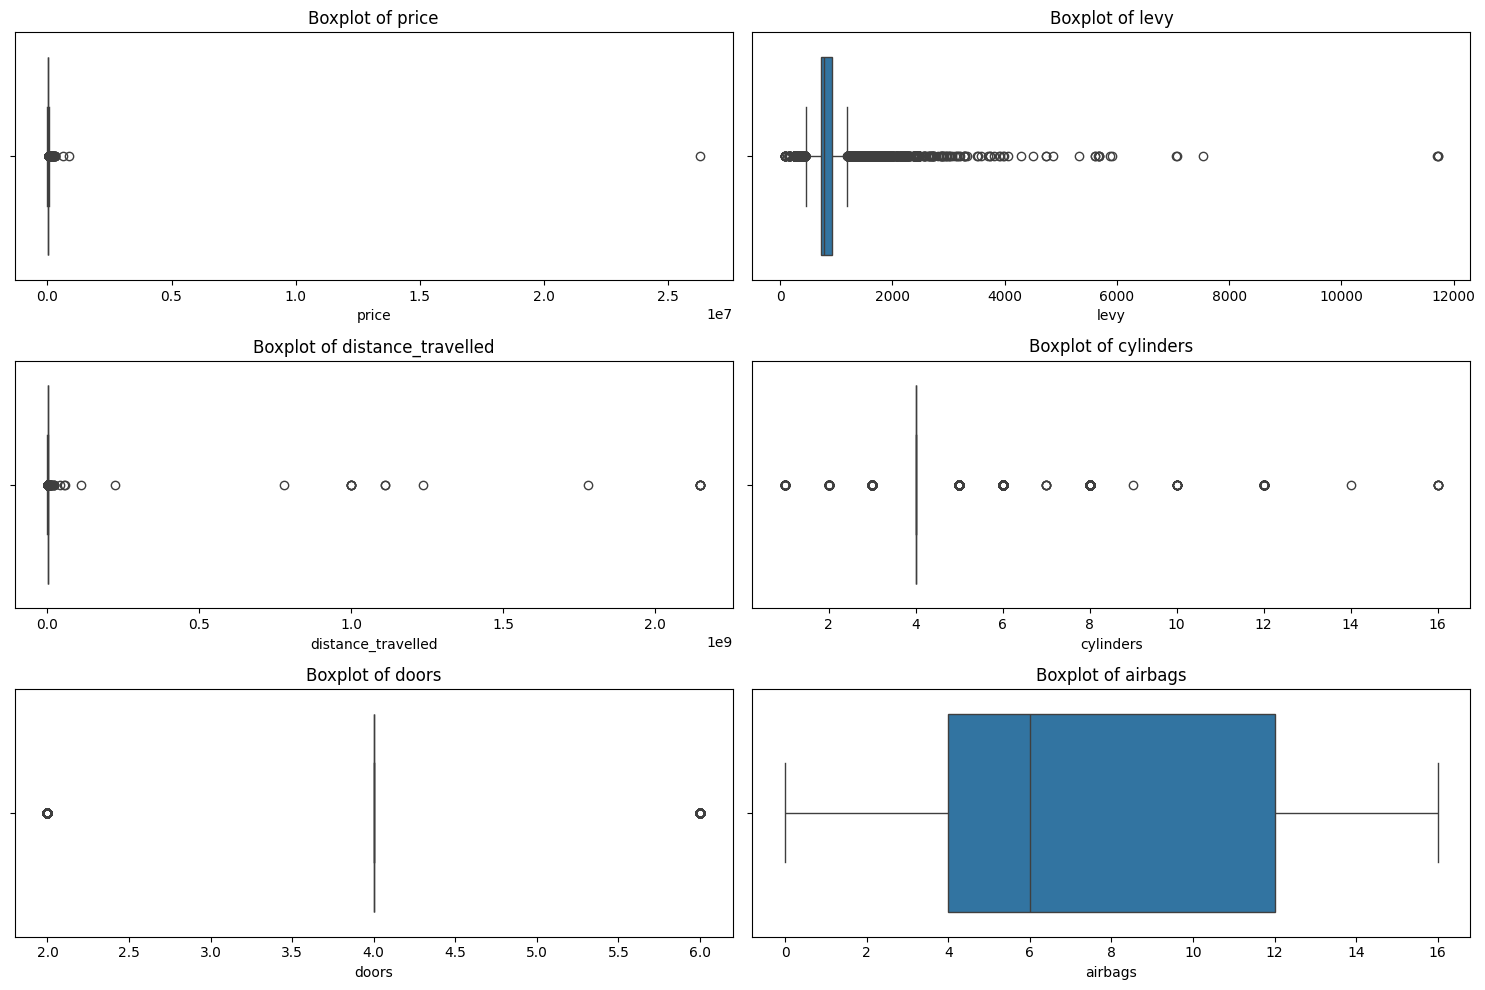

In [19]:
# Step 1: Visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize each column to check for outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [20]:
# Identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and print outliers for each column
for column in numeric_columns:
    outliers = identify_outliers_iqr(df, column)
    print(f"Outliers in {column}: {len(outliers)}")


Outliers in price: 1055
Outliers in levy: 3103
Outliers in distance_travelled: 635
Outliers in cylinders: 4765
Outliers in doors: 892
Outliers in airbags: 0


In [21]:
# Identify outliers using Z-Score
from scipy import stats
import numpy as np

def identify_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Identify and print outliers for each column using Z-score
for column in numeric_columns:
    outliers = identify_outliers_zscore(df, column)
    print(f"Outliers in {column} (using Z-score): {len(outliers)}")

Outliers in price (using Z-score): 3
Outliers in levy (using Z-score): 250
Outliers in distance_travelled (using Z-score): 18
Outliers in cylinders (using Z-score): 57
Outliers in doors (using Z-score): 892
Outliers in airbags (using Z-score): 0


## **Approach for Handling Outliers**

### 1. **Price**
   - The large number of outliers detected with the **IQR method** (1,055) suggests that the `price` column may contain many extreme values or a skewed distribution.
   - The **Z-score method** identifies only 3 outliers, indicating that these are likely extreme cases.
   - **Action**: Use the **Z-score method** to remove the 3 most extreme outliers, retaining more data while eliminating only the most unusual values.

### 2. **Doors**
   - Both methods detect 892 outliers, indicating a consistent presence of unusual values.
   - These outliers could represent incorrect or rare values, especially if the data typically includes standard door counts (e.g., 2, 4, or 5).
   - **Action**:
      - Inspect the unique values in the `doors` column to identify any implausible values (e.g., numbers significantly higher than 5).
      - **Option 1**: Remove rows with these extreme values if they appear invalid.
      - **Option 2**: Cap the outliers at a reasonable maximum (e.g., 5 or 6 doors) if they appear plausible but rare.

### 3. **Cylinders**
   - The **IQR method** detects 4,765 outliers, which is a large portion of the data, while the **Z-score method** finds only 57 outliers.
   - This indicates that many of the “outliers” by IQR might be high but still within a reasonable range for this feature.
   - **Action**: Use the **Z-score method** to remove only the 57 extreme values. Given that `cylinders` can vary widely across vehicles (e.g., 3, 4, 6, 8, 12), this approach should retain realistic values while filtering out the most extreme cases.

### 4. **Levy**
   - The **IQR method** detects 3103 outliers, which is a large portion of the data, while the **Z-score method** finds only 250 outliers.
   - This indicates that many of the “outliers” by IQR might be high but still within a reasonable range for this feature.
   - **Action**: Use the **Z-score method** to remove only the 250 extreme values. This approach should retain realistic values while filtering out the most extreme cases.

### 5. **Distance Travelled**
   - The **IQR method** detects 635 outliers, which is a large portion of the data, while the **Z-score method** finds only 18 outliers.
   - **Action**:  Use the **Z-score method** to remove only the 18 extreme values. This approach should retain realistic values while filtering out the most extreme cases.

---

This approach allows for a targeted handling of outliers by evaluating each column's specific characteristics and expected value ranges.

In [22]:
import numpy as np
from scipy import stats

# 1. Handle outliers in 'price' using Z-score
z_scores_price = np.abs(stats.zscore(df['price']))
price_threshold = 3  # Z-score threshold for 'price'
df = df[z_scores_price < price_threshold]

# 2. Handle outliers in 'doors'
# Inspect unique values in 'doors' to identify unusual values
print(df['doors'].unique())

# Cap values above 6 (assuming a realistic max door count)
df['doors'] = np.where(df['doors'] > 6, 6, df['doors'])

# 3. Handle outliers in 'cylinders' using Z-score
z_scores_cylinders = np.abs(stats.zscore(df['cylinders']))
cylinders_threshold = 3  # Z-score threshold for 'cylinders'
df = df[z_scores_cylinders < cylinders_threshold]

# 4. Handle outliers in 'levy'
z_scores_levy = np.abs(stats.zscore(df['levy']))
levy_threshold = 3  # Z-score threshold for 'price'
df = df[z_scores_levy < levy_threshold]

# 5. Handle outliers in 'distance_travelled'
z_scores_distance_travelled = np.abs(stats.zscore(df['distance_travelled']))
distance_travelled_threshold = 3  # Z-score threshold for 'price'
df = df[z_scores_distance_travelled < distance_travelled_threshold]
# Display the cleaned DataFrame info
df.info()

[4 2 6]
<class 'pandas.core.frame.DataFrame'>
Index: 18582 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  18582 non-null  int64         
 1   price               18582 non-null  int64         
 2   levy                18582 non-null  int64         
 3   manufacturer        18582 non-null  object        
 4   model               18582 non-null  object        
 5   manufacturing_year  18582 non-null  datetime64[ns]
 6   category            18582 non-null  object        
 7   leather_interior    18582 non-null  object        
 8   fuel_type           18582 non-null  object        
 9   engine_volume       18582 non-null  object        
 10  distance_travelled  18582 non-null  int64         
 11  cylinders           18582 non-null  float64       
 12  gear_box_type       18582 non-null  object        
 13  drive_wheels        18582 non-null  object 

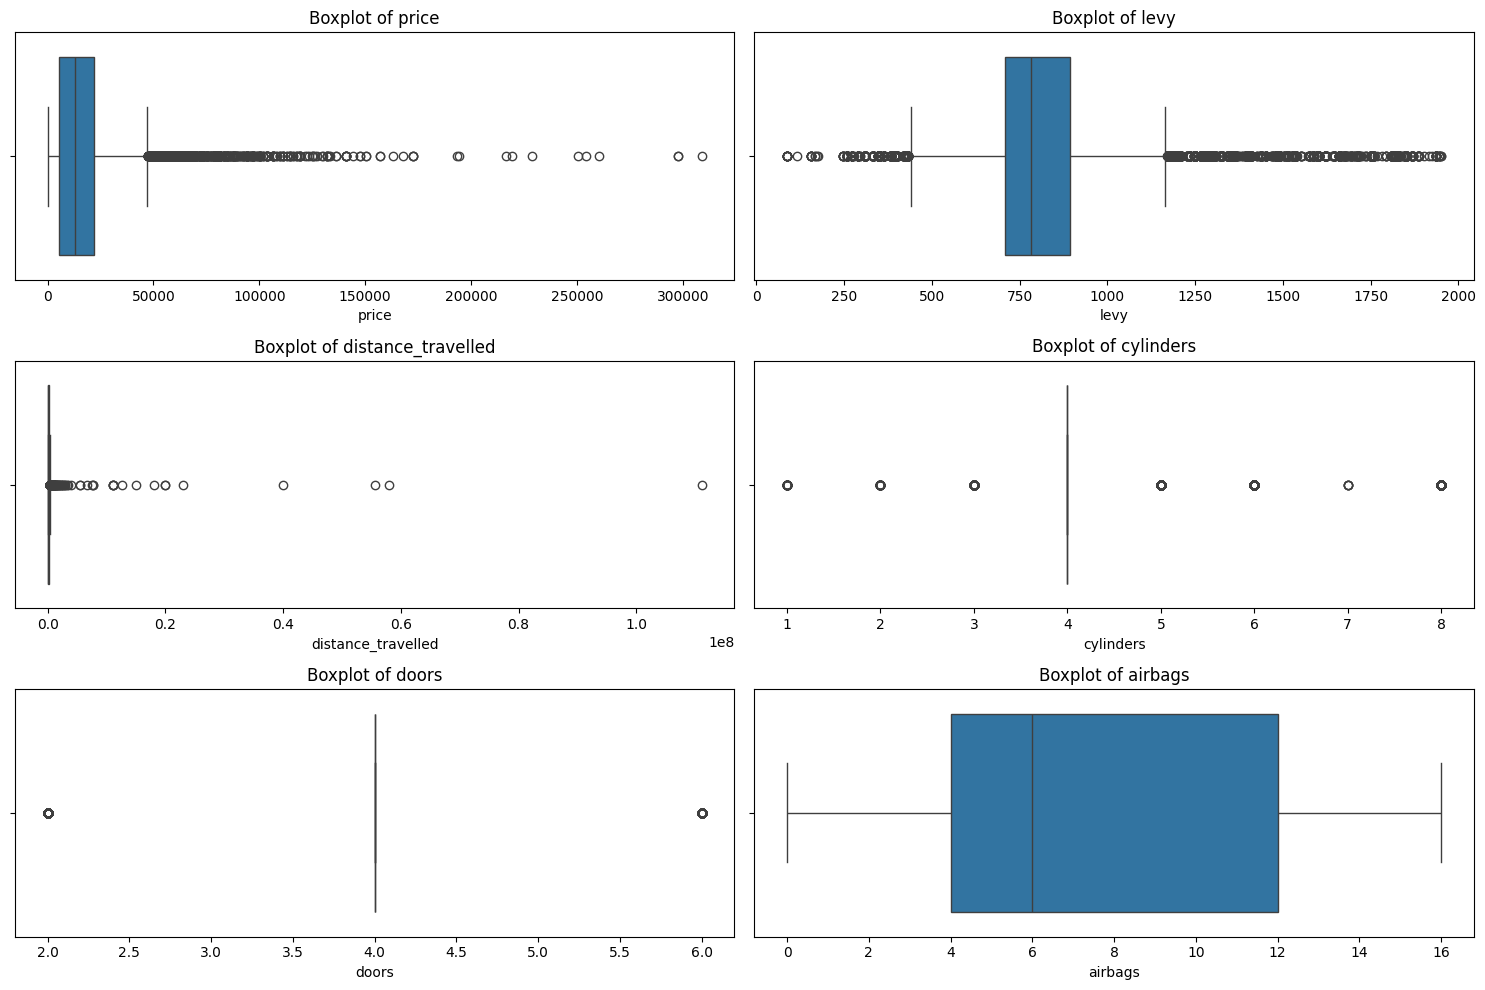

In [23]:
# Visualize numerical columns after removing outliers 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize each column to check for outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## **Step 4: Univariate Analysis**
### **Approach**

Univariate analysis involves the analysis of each individual feature to understand its distribution, central tendency, spread, and the presence of outliers. This helps in understanding data characteristics, detecting anomalies, and informing data preprocessing steps.

#### **1. Summary Statistics**
- **Purpose**: To gain an initial understanding of the distribution of numerical features.
- **What to do**: 
  - Calculate summary statistics (e.g., mean, median, standard deviation, minimum, maximum, and quantiles) to understand the central tendency and spread of the data.
  - Use `pandas.describe()` to get these statistics for numerical features.

#### **2. Distribution Plots for Numerical Features**
- **Purpose**: To visually inspect the distribution of numerical features.
- **What to do**: 
  - **Histograms**: Show the frequency distribution of numerical features.
  - **Density Plots (KDE)**: Provide a smoothed representation of the distribution.
  - **Boxplots**: Visualize the spread of data and help identify potential outliers.

#### **3. Frequency Distribution for Categorical Features**
- **Purpose**: To understand the distribution of categories within categorical variables.
- **What to do**:
  - Use **countplots** to visualize the count of each unique category in categorical features.
  - Check for imbalances or dominance of a particular category, which may indicate data issues or class imbalance.

#### **4. Outlier Detection**
- **Purpose**: To identify extreme values or anomalies in numerical data.
- **What to do**: 
  - Use **boxplots** to visually detect outliers.
  - Decide whether to handle the outliers by removal, transformation, or capping based on their impact on the model.


In [24]:
# 1. Summary Statistics for Numerical Columns
df.describe()

,id,price,levy,manufacturing_year,distance_travelled,cylinders,doors,airbags
count,1.858200e+04,18582.000000,18582.000000,18582,1.858200e+04,18582.000000,18582.000000,18582.000000
mean,4.557636e+07,17095.829889,840.964858,2010-12-10 23:31:05.676461312,1.678545e+05,4.525778,3.932623,6.565278
min,2.074688e+07,1.000000,87.000000,1939-01-01 00:00:00,0.000000e+00,1.000000,2.000000,0.000000
25%,4.569191e+07,5331.000000,708.750000,2009-01-01 00:00:00,7.074275e+04,4.000000,4.000000,4.000000
50%,4.577202e+07,13172.000000,781.000000,2012-01-01 00:00:00,1.260195e+05,4.000000,4.000000,6.000000
75%,4.580183e+07,22063.000000,893.000000,2015-01-01 00:00:00,1.881940e+05,4.000000,4.000000,12.000000
max,4.581665e+07,308906.000000,1951.000000,2020-01-01 00:00:00,1.111111e+08,8.000000,6.000000,16.000000
std,9.383852e+05,17974.496437,279.945132,NaN,1.122086e+06,1.085871,0.425977,4.302888


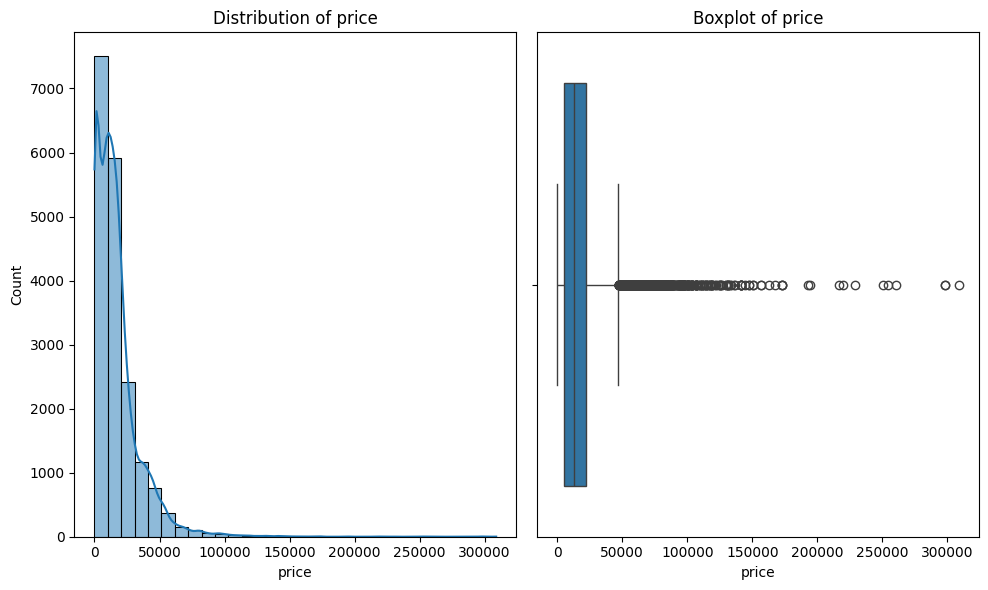

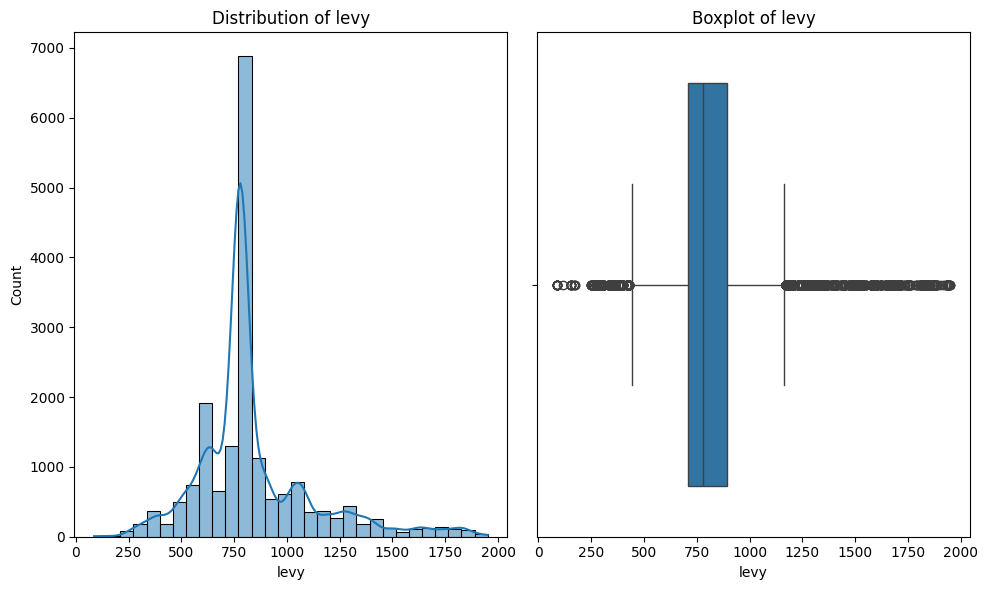

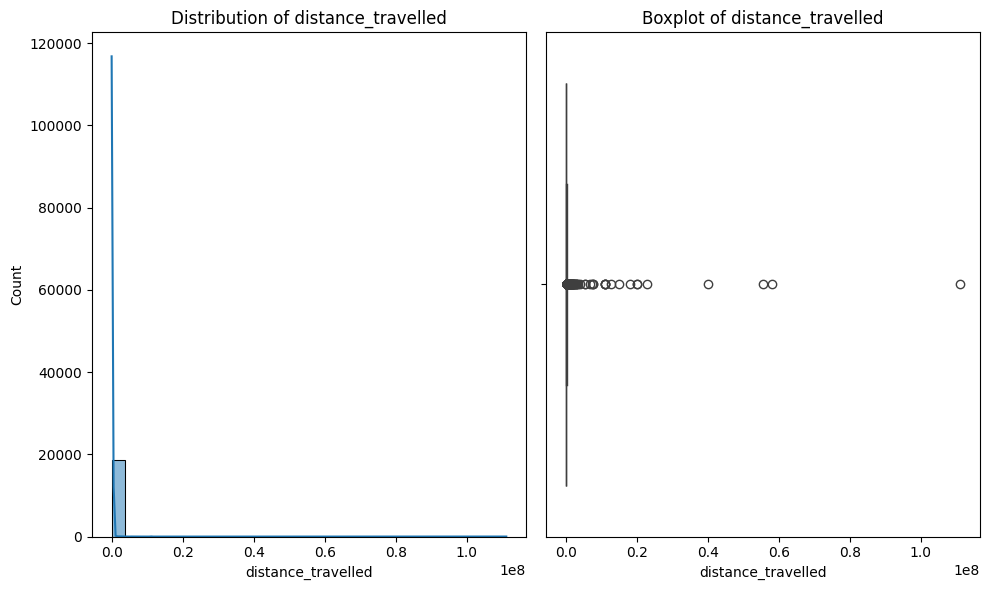

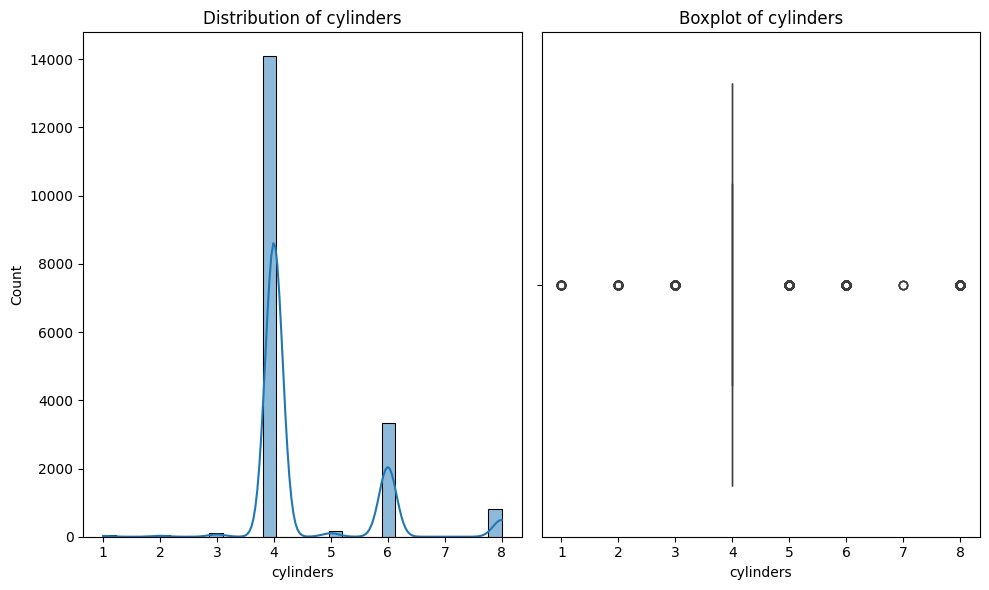

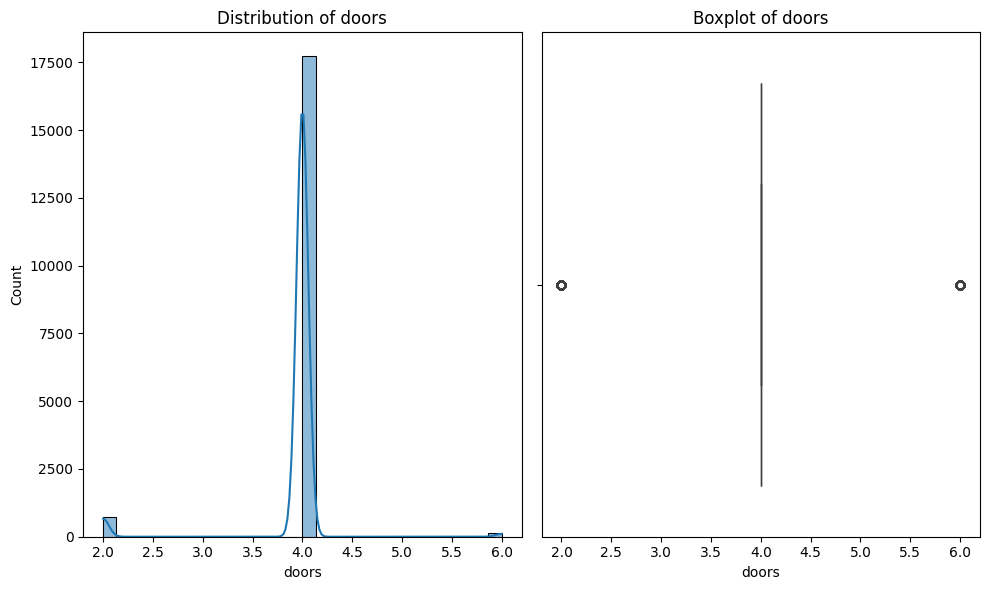

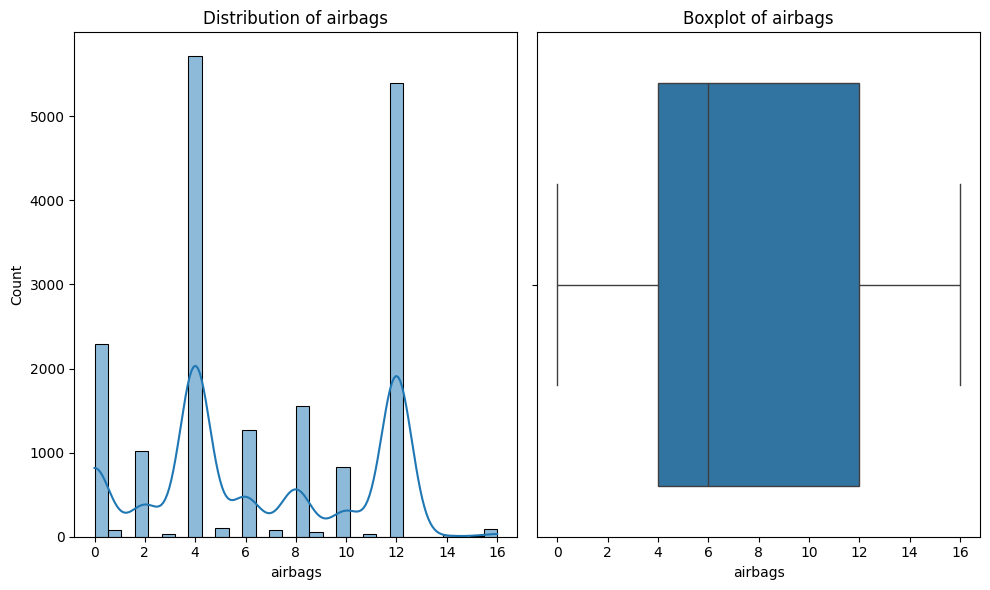

In [25]:
# 2. Distribution Plots for Numerical Features (Histograms, Density Plots)
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of numerical columns you want to analyze
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('id')

for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Plot Histogram and KDE (Density Plot)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    
    # Plot Boxplot to visualize spread and outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

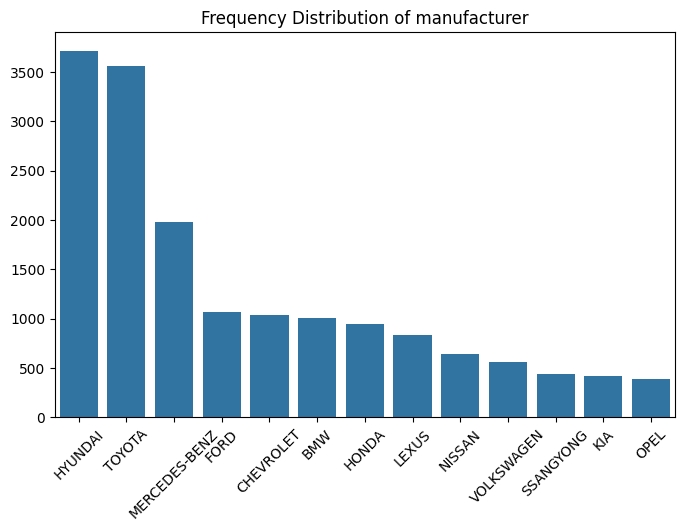

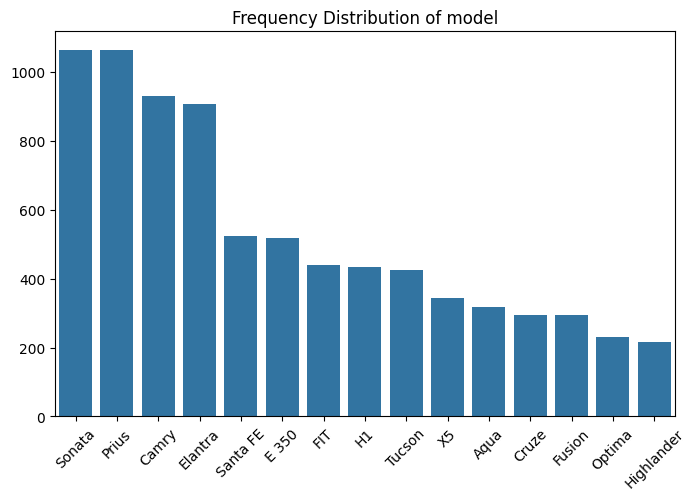

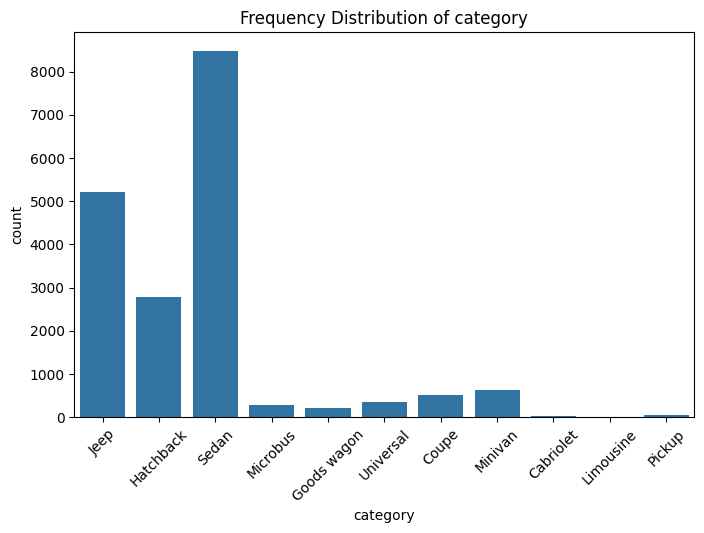

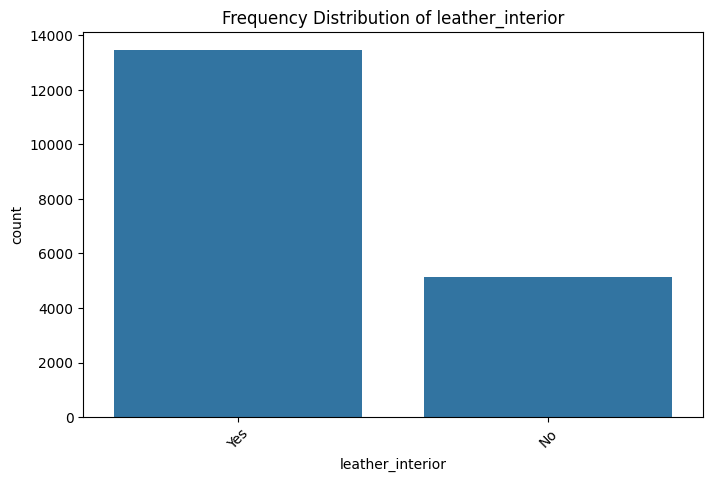

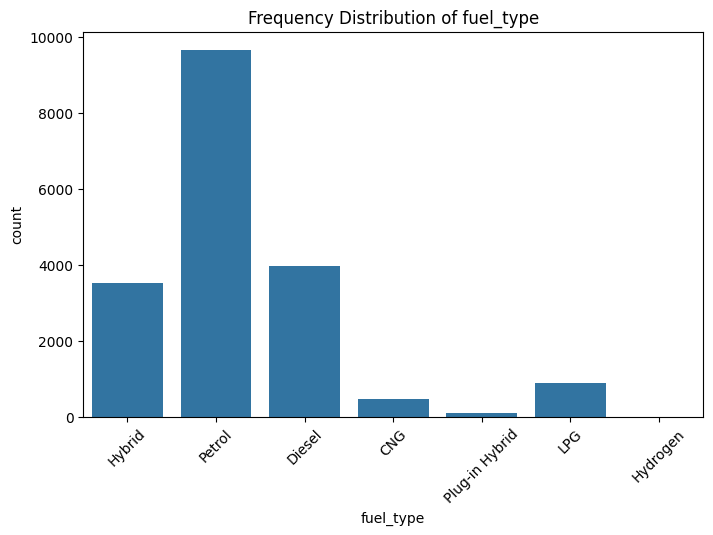

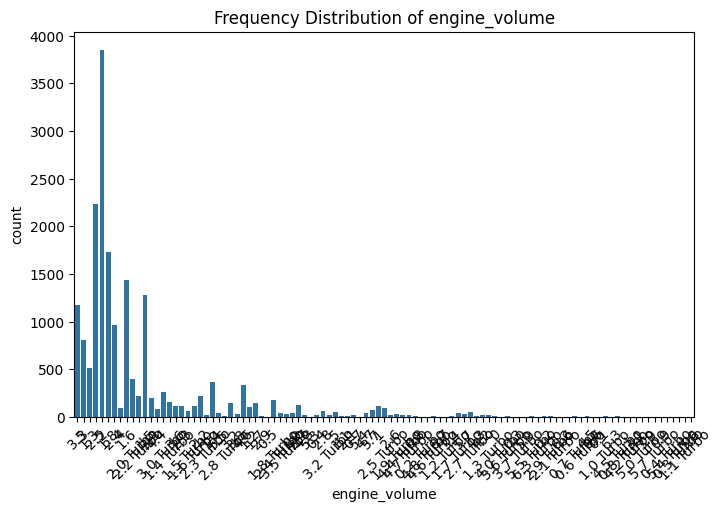

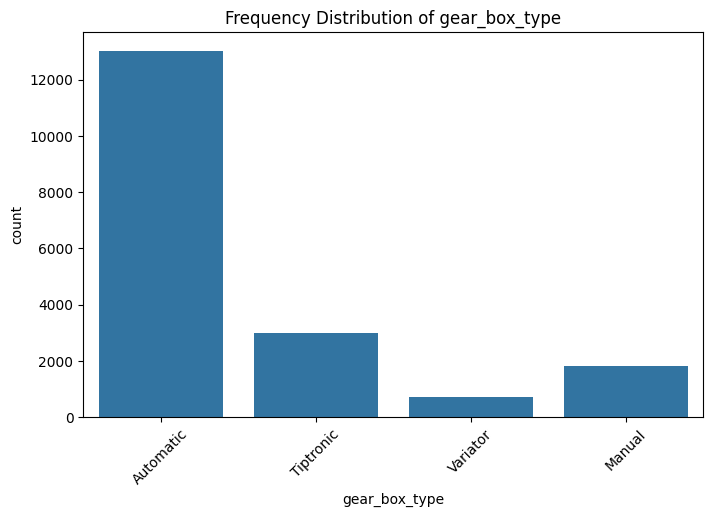

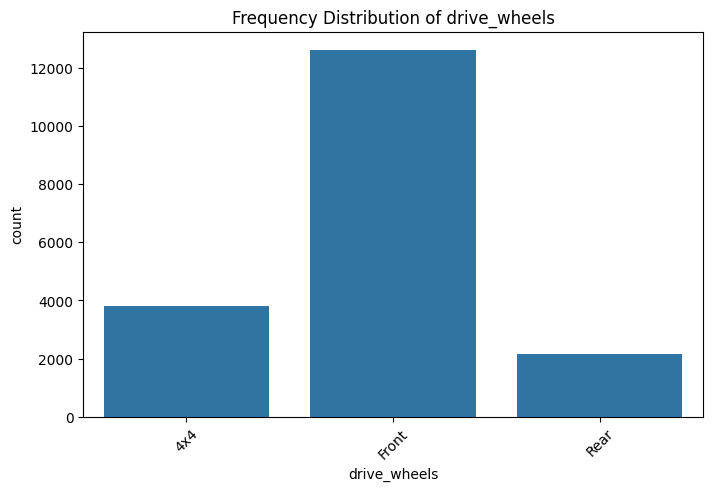

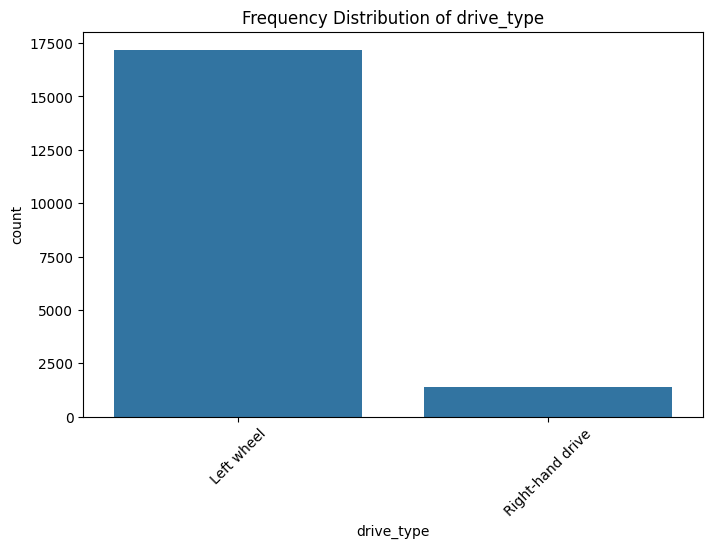

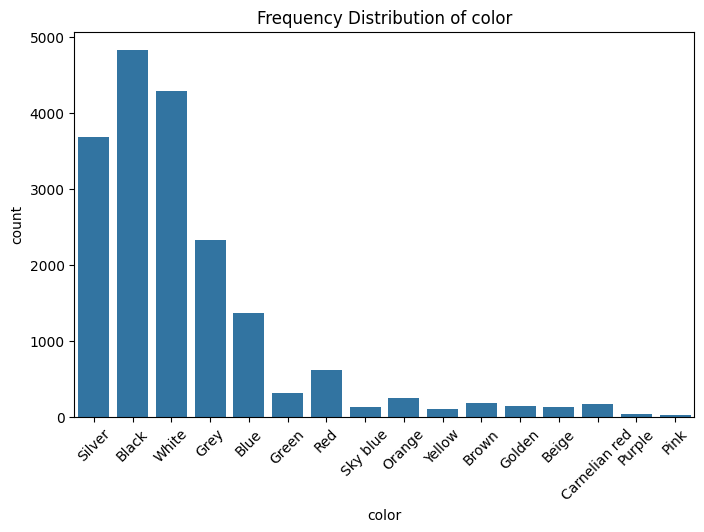

In [26]:
# 3. Frequency Distribution for Categorical Features

# Define the list of categorical columns you want to analyze
categorical_columns = df.select_dtypes(include='object').columns.to_list()

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    if column == 'manufacturer':
        model_counts = df['manufacturer'].value_counts()
        filtered_model_counts = model_counts[model_counts > 300]
        model_counts_dict = filtered_model_counts.to_dict()
        sns.barplot(x=list(model_counts_dict.keys()), y=list(model_counts_dict.values()))
    elif column == 'model':
        model_counts = df['model'].value_counts()
        filtered_model_counts = model_counts[model_counts > 200]
        model_counts_dict = filtered_model_counts.to_dict()
        sns.barplot(x=list(model_counts_dict.keys()), y=list(model_counts_dict.values()))
    else:
        sns.countplot(x=df[column])
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

## **Step 5: Bivariate Analysis**
### **Approach**
Bivariate analysis helps us understand the relationship between two variables. In this case, we will explore how the **target variable** (e.g., `price`) relates to both numerical and categorical features in the dataset.

The approach for bivariate analysis will be as follows:

1. **Correlation Matrix for Numerical Features**: To identify linear relationships between numerical columns.
2. **Scatter Plots for Numerical Features**: To visualize relationships between numerical variables.
3. **Boxplots for Categorical vs Numerical**: To explore how numerical features vary across categories.
4. **Count Plots for Categorical vs Categorical**: To visualize the relationships between two categorical variables.

---

### **Step 1: Correlation Matrix for Numerical Features**

- **Goal**: Identify the linear relationships between numerical features.
- **Method**: Use a heatmap to visualize the correlation matrix.

---

### **Step 2: Scatter Plots for Numerical Features**

- **Goal**: Visualize relationships between numerical features and target variable.
- **Method**: Plot scatter plots for each pair of numerical features and the target variable (`price`).

---

### **Step 3: Boxplots for Categorical vs Numerical Features**

- **Goal**: Examine how the target variable (`price`) is distributed across different categories.
- **Method**: Use boxplots for each categorical feature to compare it with `price`.

---

### **Step 4: Count Plots for Categorical vs Categorical Features**

- **Goal**: Visualize the relationship between two categorical features.
- **Method**: Use count plots to explore the distribution between two categorical columns.

---


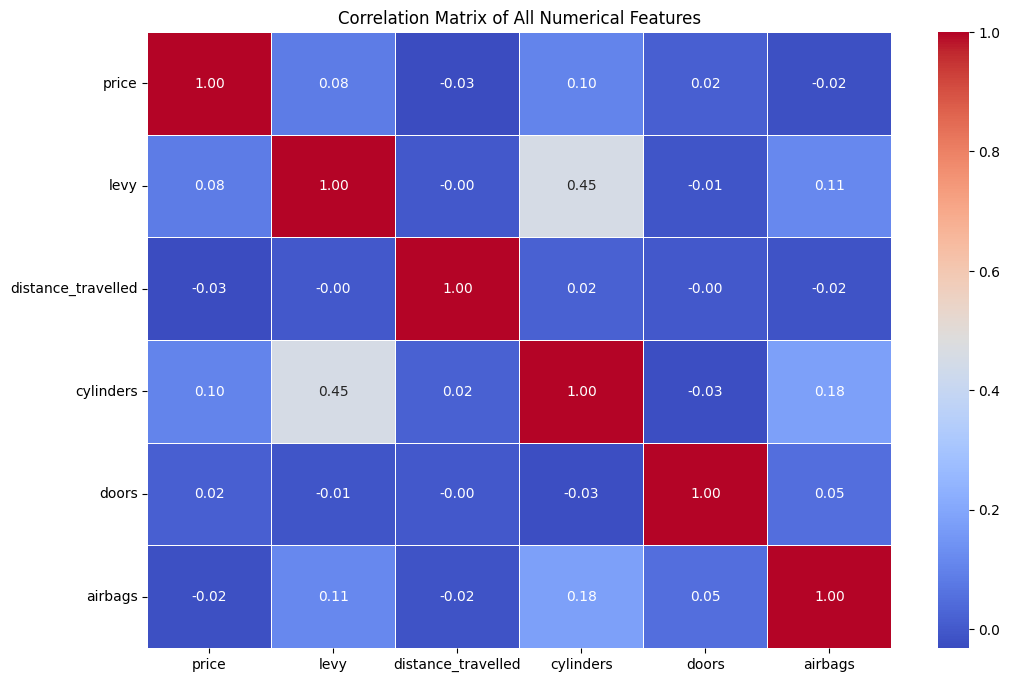

In [27]:
# Correlation matrix

# Step 1: Calculate the correlation matrix for all numerical features
numeric_df = df[numerical_columns]
correlation_matrix = numeric_df.corr()

# Step 2: Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of All Numerical Features')
plt.show()

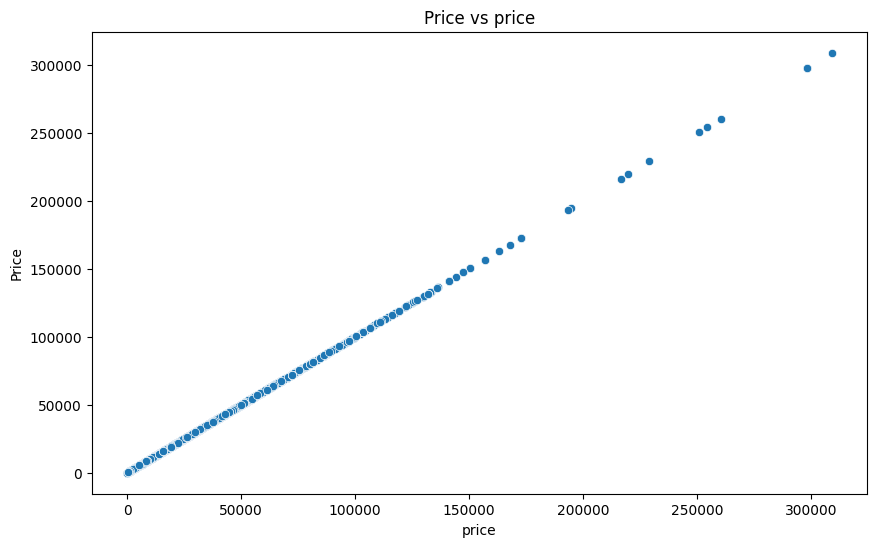

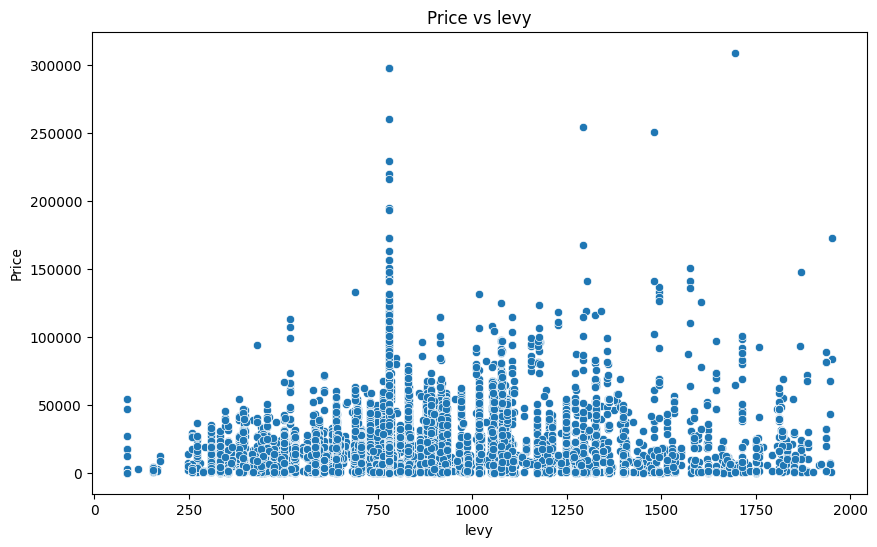

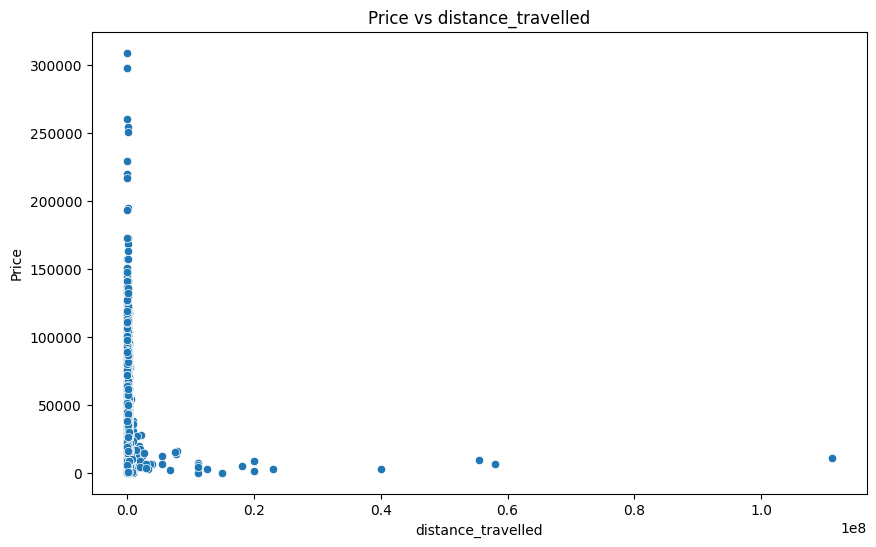

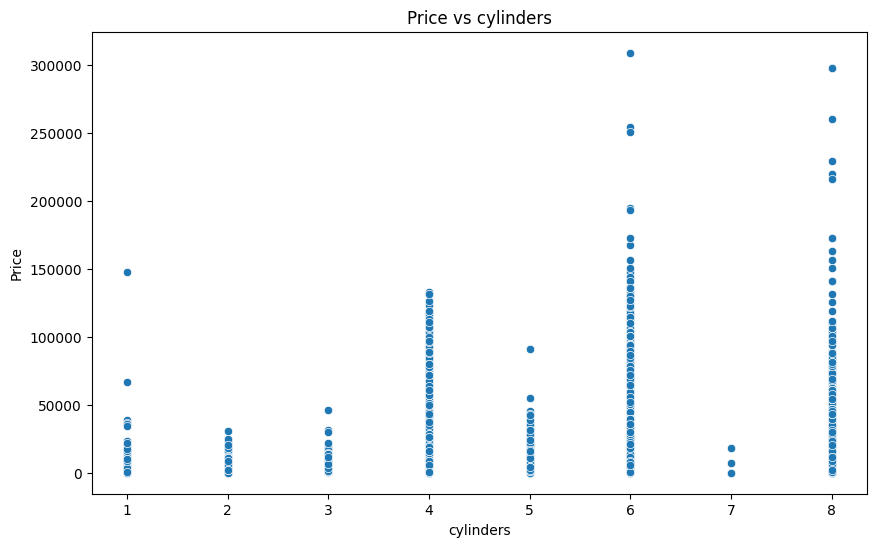

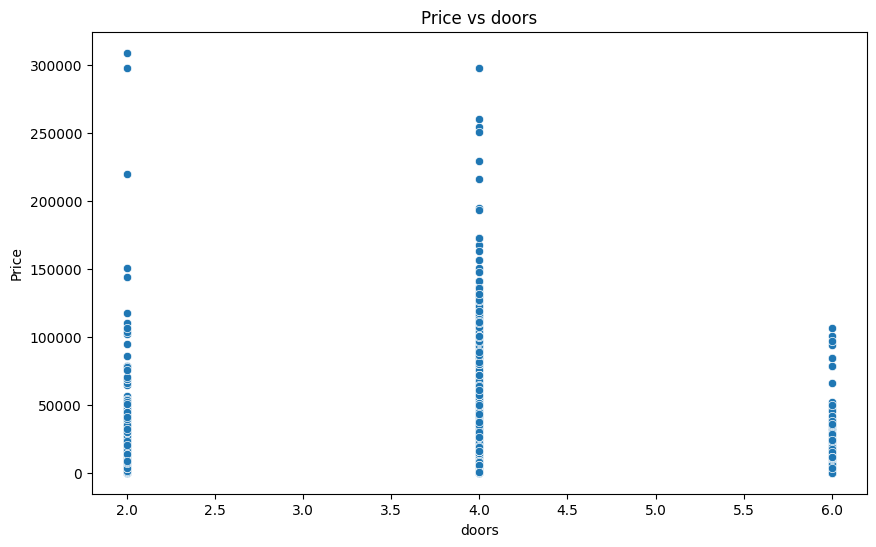

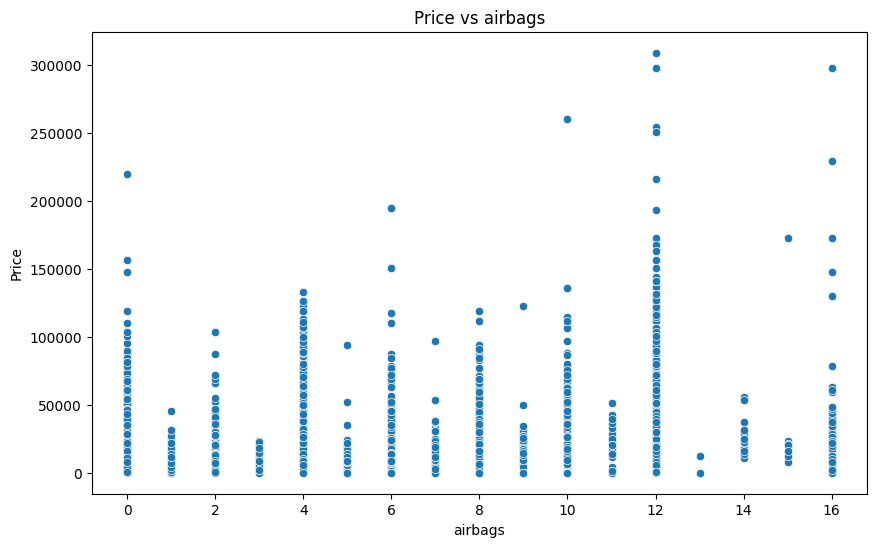

In [28]:
# scatter plots for price vs  numeric features
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['price'])  # price vs each numerical column
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

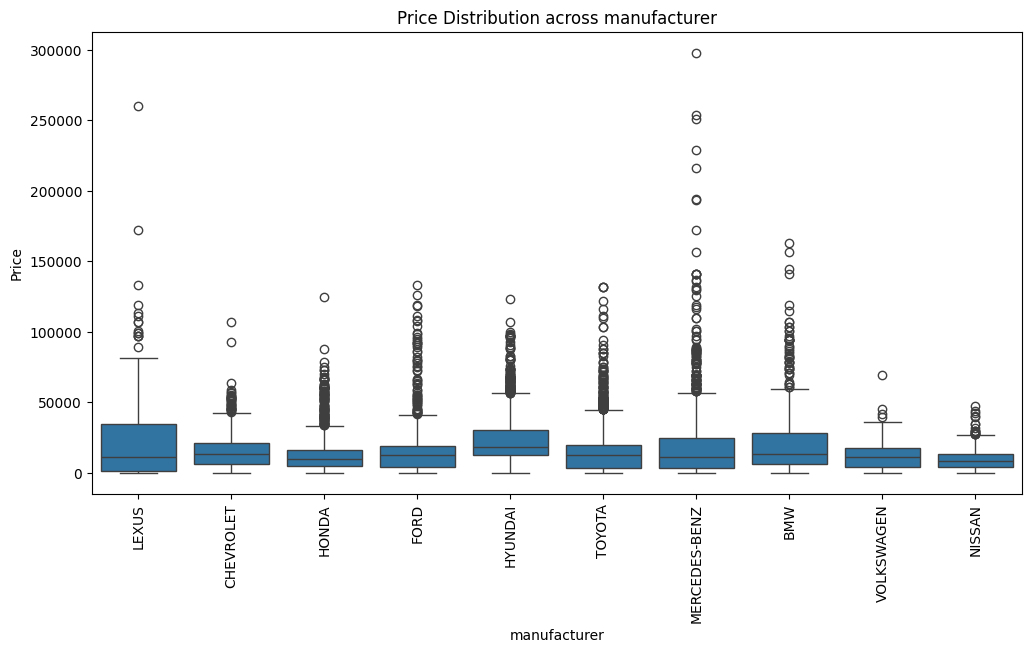

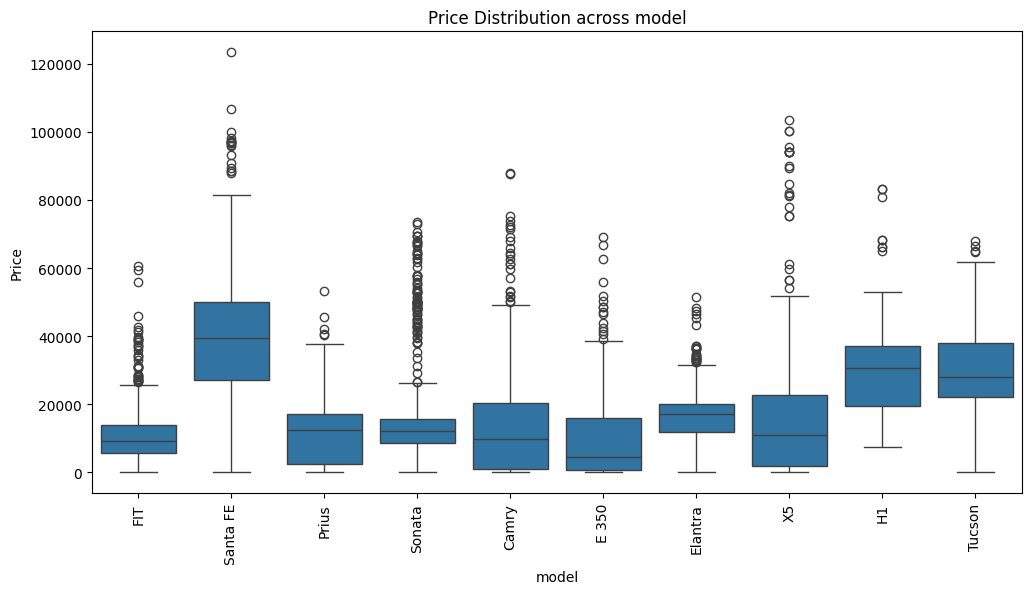

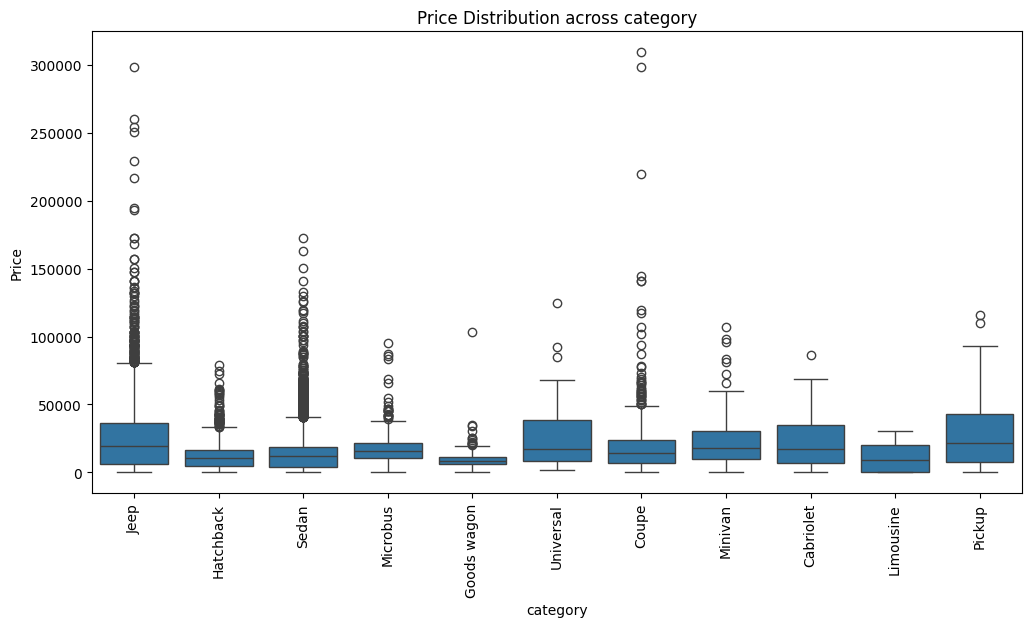

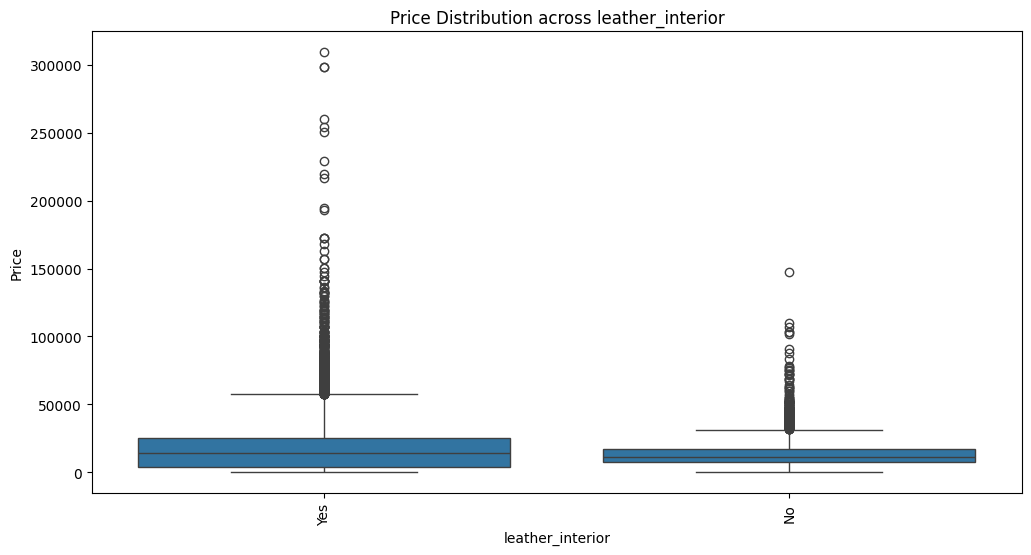

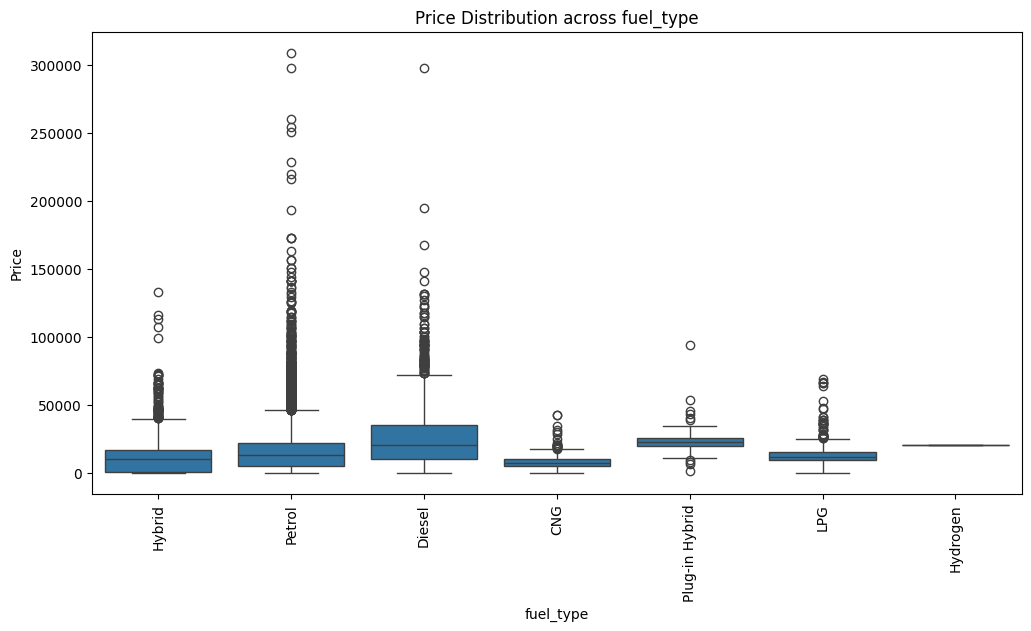

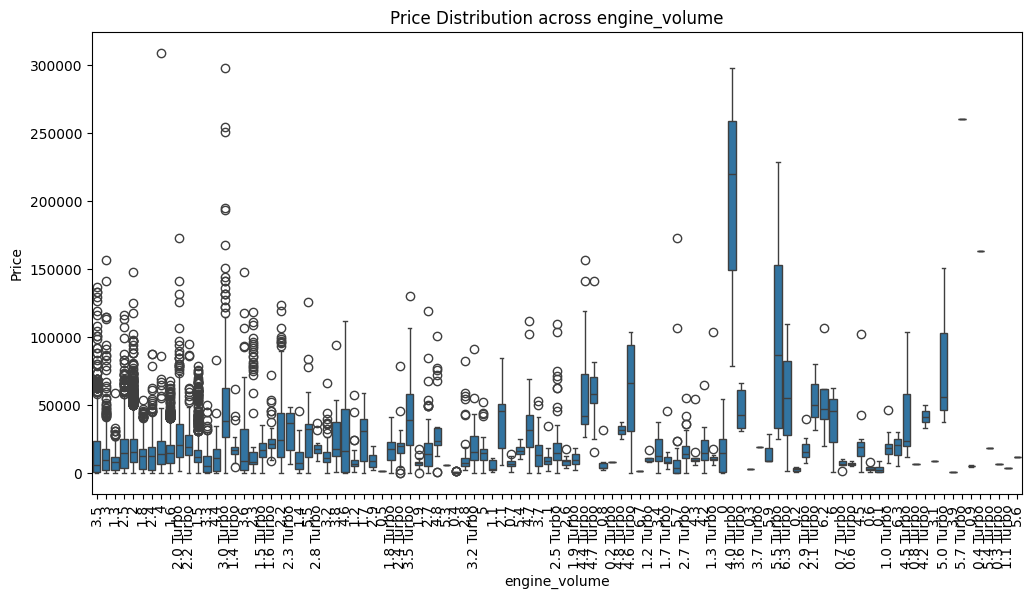

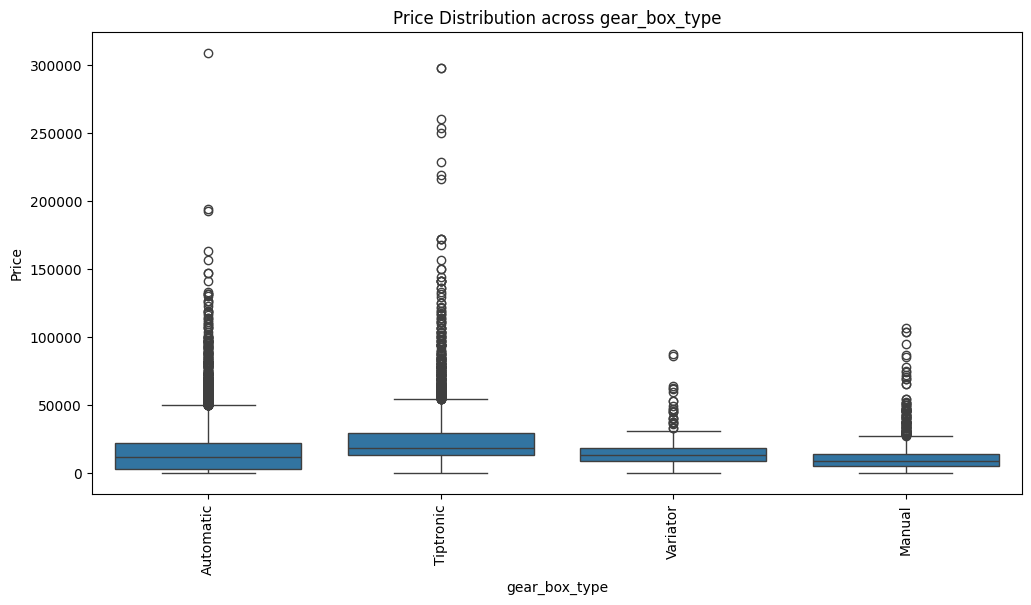

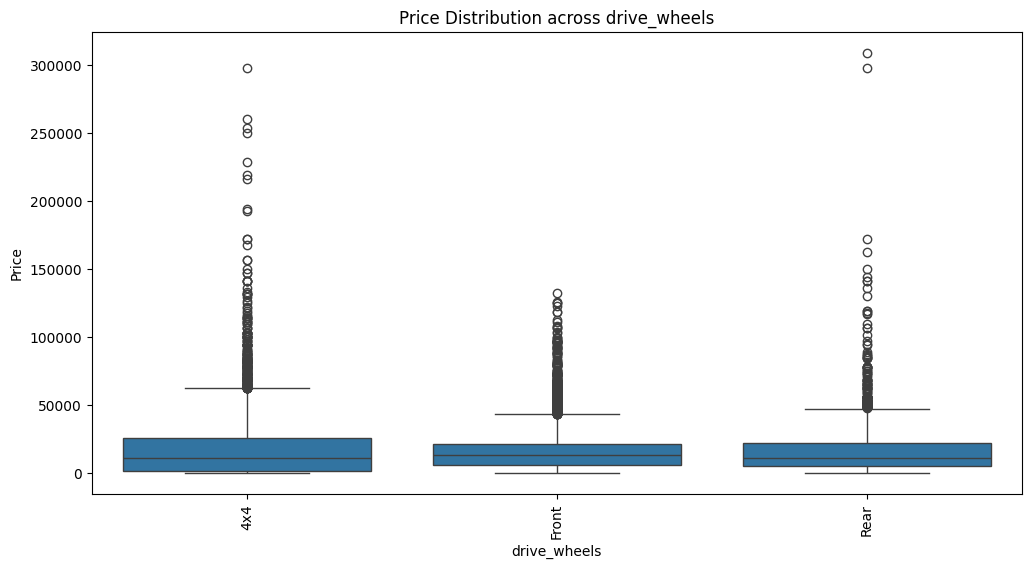

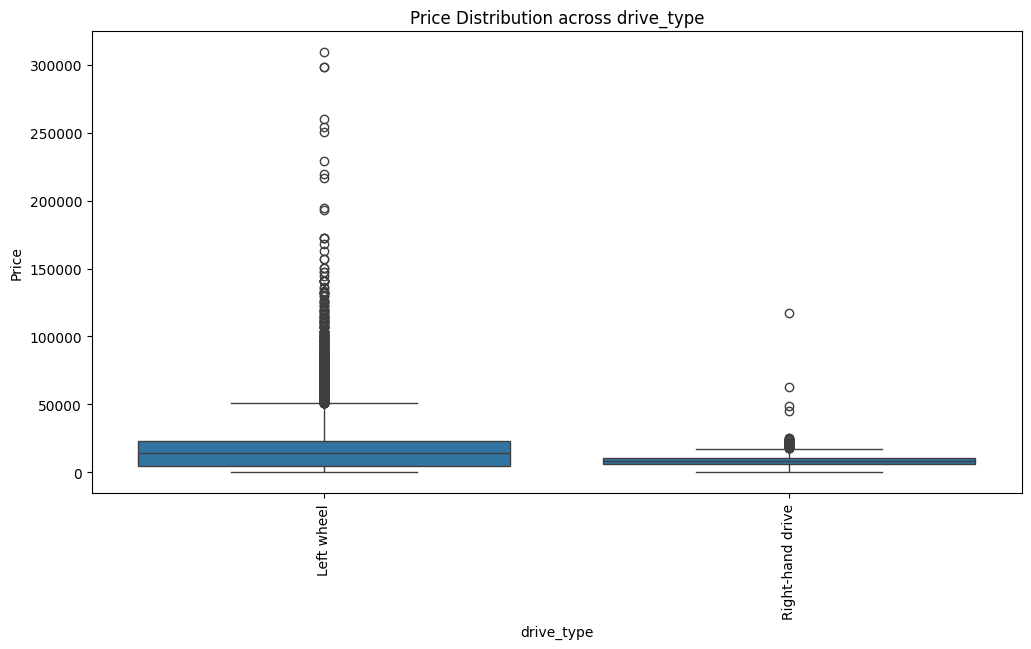

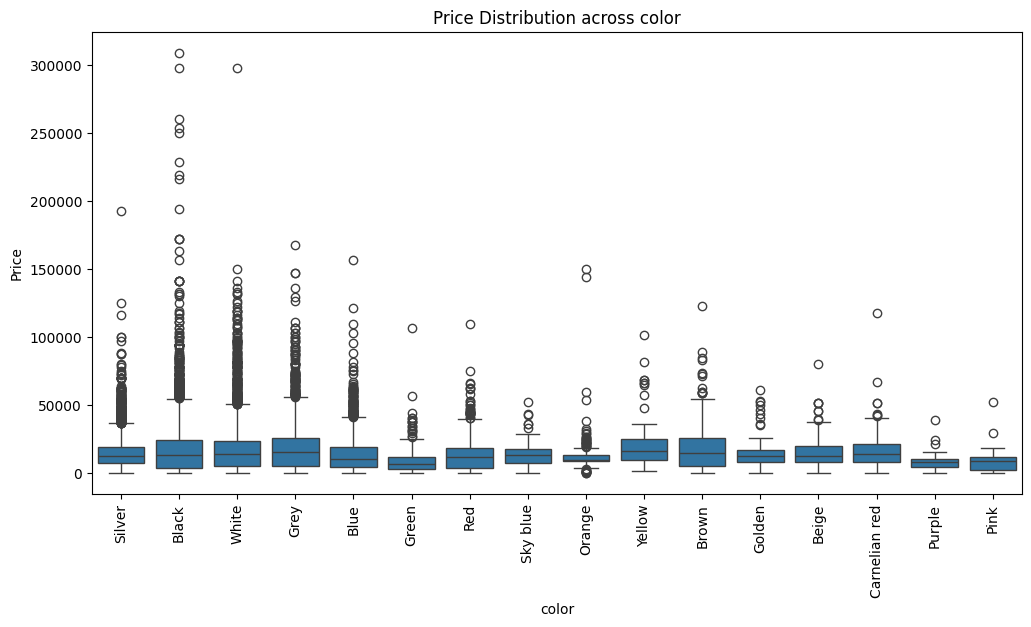

In [29]:
#  Boxplot for Categorical vs Numerical Features

# Step 1: List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Boxplot for categorical vs numerical (Price vs Categorical Features)
for col in categorical_columns:
    # For 'manufacturer' and 'model', we select the top 10 most frequent values
    if col == 'manufacturer':
        top_values = df['manufacturer'].value_counts().nlargest(10).index.values
        df_filtered = df[df['manufacturer'].isin(top_values)]
    elif col == 'model':
        top_values = df['model'].value_counts().nlargest(10).index.values
        df_filtered = df[df['model'].isin(top_values)]
    else:
        df_filtered = df
    
    # Create boxplot for the filtered data
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_filtered[col], y=df_filtered['price'])  # price vs each categorical column
    plt.title(f'Price Distribution across {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=90)  # Rotate x-ticks if needed
    plt.show()


In [30]:
# Save the cleaned data
df.to_csv('../../data/cleaned_data.csv',index=False)

## **Step 6: Insights**
### 1. Price Analysis
- **Distribution**: The `price` feature is left-skewed, indicating that most cars are on the lower end of the price range.
- **Outliers**: We detected and removed a small number of extreme outliers to improve the model’s ability to generalize.

### 2. Categorical Features
- **Manufacturer**: The top 10 manufacturers account for most of the entries, with `Hyundai` and `Toyota` having the highest prices on average, suggesting brand significantly impacts price.
- **Model**: There is a large variety of models, but only a few are highly represented. Filtering top models may improve model focus on the most relevant data.

### 3. Relationship Between Numerical Features
- **Manufacturing Year**: Newer cars generally have higher prices, as expected. The positive relationship with `price` suggests this feature will be a strong predictor.
- **Distance Travelled**: The feature is left-skewed, indicating most cars have relatively low mileage. Distance has a moderate negative correlation with price, showing that older, high-mileage cars tend to be cheaper.

### 4. Summary of Outliers and Missing Data
- **Outliers**: Outliers were present in `price`, `cylinders`, and `doors`. We removed extreme outliers based on Z-score for cleaner data.
- **Missing Data**: We handled missing values in the `levy` column by imputing the median to retain as much data as possible.

### 5. Potential Challenges
- **Feature Skewness**: The left-skewed distribution of `price` and `distance_travelled` may necessitate transformations for linear models.
- **Non-Linear Relationships**: The weak linear relationships between features and `price` suggest that non-linear models (like Random Forest or Gradient Boosting) may perform better.

---

These insights can guide feature engineering and model selection, ensuring that each decision aligns with the data’s structure and patterns.
